##### Packages

In [90]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

##### Paths

In [91]:
SLD_DIR = "/home/adel/Documents/Code/Ant-Miner/datasets/"
MLD_DIR = "/home/adel/Documents/Code/Ant-Miner/datasets/multi_label/"

##### Loading Data

In [92]:
dataset = pd.read_csv(os.path.join(SLD_DIR, "mushrooms.csv"))
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,pos,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,neg,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,neg,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,pos,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,neg,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [93]:
# rename cols with target in it to labelx
labels = [col for col in dataset.columns if "class" in col]
#dataset.rename(columns={col: f"label{idx+1}" for idx, col in enumerate(labels)}, inplace=True)
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,pos,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,neg,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,neg,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,pos,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,neg,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [94]:
#labels = [col for col in dataset.columns if 'label' in col]
features = [col for col in dataset.columns if col not in labels]
print(f"Features: {len(features)}\nLabels: {len(labels)}")

Features: 22
Labels: 1


##### Missing Values

In [57]:
# check for missing values
print(f'Missing values: {dataset.isnull().sum().sum()}')

Missing values: 0


##### Duplicated Rows

In [58]:
# check duplicated rows
print(f"Duplicated rows: {dataset.duplicated().sum()}")

Duplicated rows: 0


In [59]:
# drop duplicated rows
dataset = dataset.drop_duplicates().reset_index(drop=True)
print(f"Duplicated rows after dropping: {dataset.duplicated().sum()}")

Duplicated rows after dropping: 0


##### Features encoding

In [34]:
# encode categorical features to numerical
for col in features:
    if dataset[col].dtype == 'object':
        dataset[col] = dataset[col].astype('category').cat.codes
dataset.head()


,protein,PS00010,PS00011,PS00012,PS00014,PS00017,PS00018,PS00019,PS00020,PS00021,...,label18,label19,label20,label21,label22,label23,label24,label25,label26,label27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Dropping Irrelevant Columns

In [35]:
# check cols with one value
one_value_cols = [col for col in dataset.columns if dataset[col].nunique() == 1]
print(f"Number of columns with one value: {len(one_value_cols)}")

Number of columns with one value: 1073


In [36]:
#dataset = dataset.drop(columns=['protein'])
dataset = dataset.drop(columns=one_value_cols)

##### Features Correlation

In [37]:
features = [col for col in dataset.columns if col not in labels]

In [38]:
# Compute correlation matrix
corr_matrix = dataset[features].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than threshold
threshold = 0.9
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print(f"Dropping {len(to_drop)} features out of {len(features)}")

#dataset = dataset.drop(columns=to_drop)

Dropping 11 features out of 113


In [39]:
labels = [col for col in dataset.columns if 'label' in col]
features = [col for col in dataset.columns if col not in labels]
print(f"Features: {len(features)}\nLabels: {len(labels)}")

Features: 113
Labels: 27


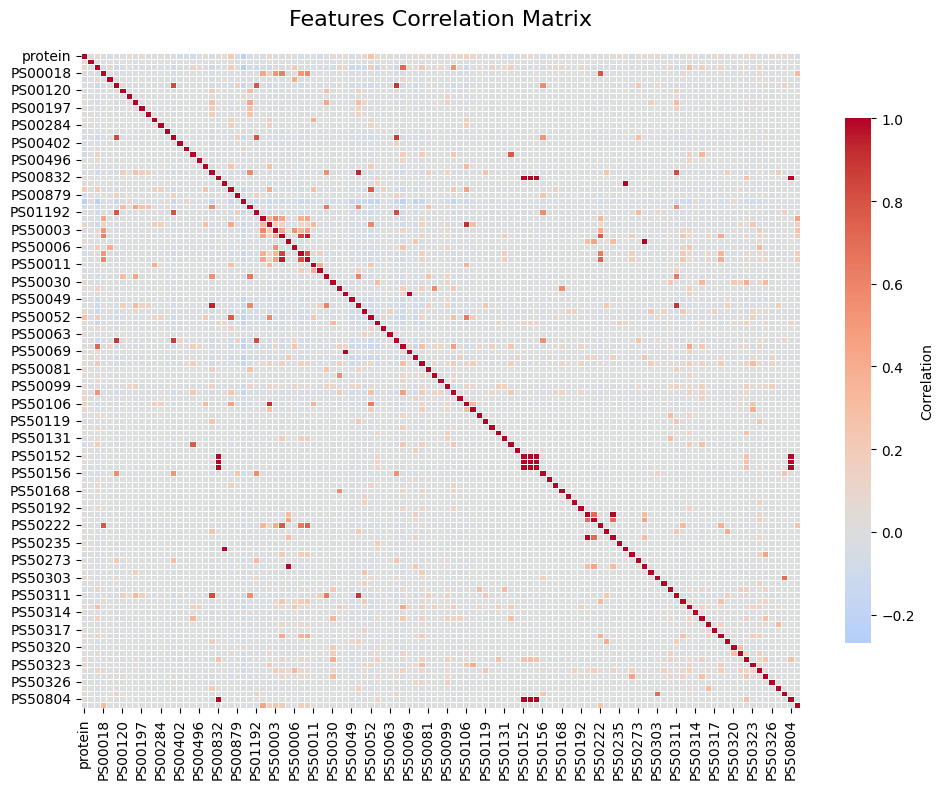

In [40]:
# Compute correlations
corr = dataset[features].corr()

# Set up the figure
plt.figure(figsize=(10, 8))

# Heatmap
sns.heatmap(
    corr, 
    annot=False,         # show correlation values
    fmt=".2f",          # 2 decimal places
    cmap="coolwarm",    # diverging color map
    center=0,           # white around 0
    linewidths=0.5,     # grid lines
    cbar_kws={"shrink": 0.8, "label": "Correlation"}
)

# Title
plt.title("Features Correlation Matrix", fontsize=16, pad=20)

plt.tight_layout()
plt.show()

In [95]:
counts = [] 
for col in labels: 
    vc = dataset[col].value_counts() 
    for val, cnt in vc.items(): 
        counts.append({"Label": col, "Value": str(val), "Count": cnt}) 
counts_df = pd.DataFrame(counts) 
# Pivot for grouped bar plotting 
pivot_df = counts_df.pivot(index="Label", columns="Value", values="Count")

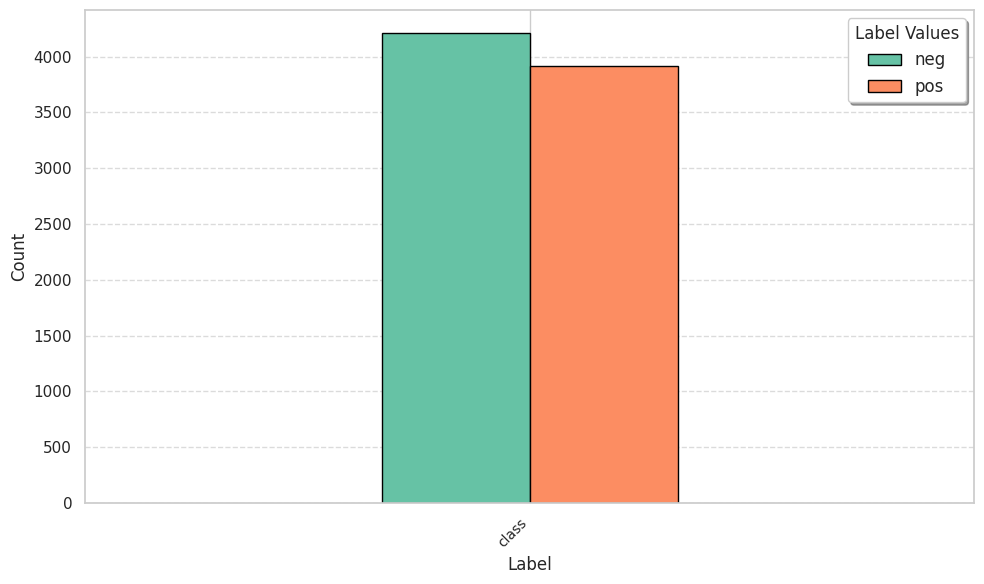

In [98]:
# Set a nicer style
sns.set_theme(style="whitegrid", palette="Set2")

# Plot
ax = pivot_df.plot(
    kind="bar", 
    figsize=(10, 6), 
    width=0.25,         # bar thickness
    edgecolor="black",  # outline bars
)

# Title and labels
plt.xlabel("Label", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45, ha="right", fontsize=10)

# Legend styling
plt.legend(
    title="Label Values", 
    title_fontsize=12, 
    fontsize=12, 
    frameon=True, 
    fancybox=True, 
    shadow=True,
    loc="upper right"
)

# Add grid for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()
plt.show()


In [181]:
# drop labels having less than 1% percentage of positive instances
label_stats = {}
for label in labels:
    pos_count = dataset[label].sum()
    neg_count = len(dataset) - pos_count
    pos_percentage = (pos_count / len(dataset)) * 100
    label_stats[label] = {
        "positive_count": pos_count,
        "negative_count": neg_count,
        "positive_percentage": pos_percentage
    }
    print(f"Label: {label}, Positive: {pos_count}, Negative: {neg_count}, Positive %: {pos_percentage:.2f}%")

    if pos_percentage < 2.0:
        dataset = dataset.drop(columns=[label])
        print(f"Dropped label {label} due to low positive percentage.")

Label: label1, Positive: 14, Negative: 578, Positive %: 2.36%
Label: label2, Positive: 81, Negative: 511, Positive %: 13.68%
Label: label3, Positive: 46, Negative: 546, Positive %: 7.77%
Label: label4, Positive: 9, Negative: 583, Positive %: 1.52%
Dropped label label4 due to low positive percentage.
Label: label5, Positive: 20, Negative: 572, Positive %: 3.38%
Label: label6, Positive: 14, Negative: 578, Positive %: 2.36%
Label: label7, Positive: 47, Negative: 545, Positive %: 7.94%
Label: label8, Positive: 40, Negative: 552, Positive %: 6.76%
Label: label9, Positive: 60, Negative: 532, Positive %: 10.14%
Label: label10, Positive: 53, Negative: 539, Positive %: 8.95%
Label: label11, Positive: 103, Negative: 489, Positive %: 17.40%
Label: label12, Positive: 28, Negative: 564, Positive %: 4.73%
Label: label13, Positive: 33, Negative: 559, Positive %: 5.57%
Label: label14, Positive: 9, Negative: 583, Positive %: 1.52%
Dropped label label14 due to low positive percentage.
Label: label15, Po

In [182]:
# rename labels after dropping
labels = [col for col in dataset.columns if 'label' in col]
new_label_names = [f"label{i+1}" for i in range(len(labels))]
dataset = dataset.rename(columns=dict(zip(labels, new_label_names)))
labels = [col for col in dataset.columns if 'label' in col]
print(f"Remaining labels: {labels}")

Remaining labels: ['label1', 'label2', 'label3', 'label4', 'label5', 'label6', 'label7', 'label8', 'label9', 'label10', 'label11', 'label12', 'label13', 'label14', 'label15']


In [183]:
dataset.head()

,audio-ssd1,audio-ssd2,audio-ssd3,audio-ssd4,audio-ssd19,audio-ssd22,audio-ssd25,audio-ssd26,audio-ssd27,audio-ssd28,...,label6,label7,label8,label9,label10,label11,label12,label13,label14,label15
0,1,1,2,3,3,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,3,3,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0
2,1,1,1,1,2,1,1,1,1,1,...,0,0,0,0,1,1,1,0,0,0
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [184]:
# save cleaned dataset
dataset.to_csv(os.path.join(MLD_DIR, "cleaned/birds.csv"), index=False)